In [9]:
using Random, Plots

In [480]:
# Genero n clases q pueden arrancar entre las 9hs y 18hs y durar de 1h a 4hs.
n = 10
I = rand(9:18, n)
F = I .+ rand(1:4, n);

## Gráficos (no se molesten leyendo el código, miren el gráfico)

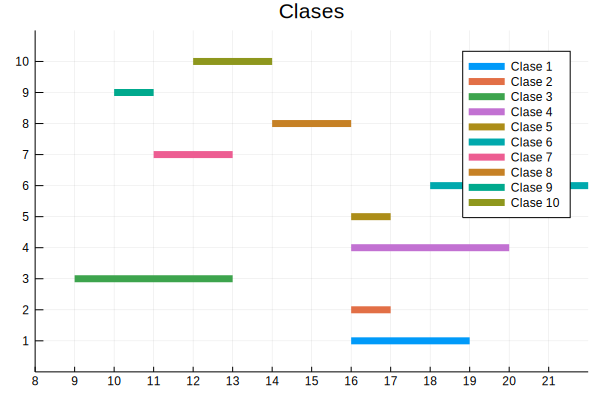

In [481]:
IF = [ collect(I[i]:F[i]) for i in 1:n ]
p = plot(IF[1], [fill(1, length(IF[1]))],
    xticks = collect(0:21), yticks = collect(1:10),
    linecolor = 1,
    xlims = (8, 22), ylims = (0, n+1), linewidth = 7,
    label = string("Clase 1"), title = "Clases")
for i in  2:n
    p = plot!(IF[i], [fill(i, length(IF[i]))], linecolor = i,
        linewidth = 7, label = string("Clase ", i))
end
p

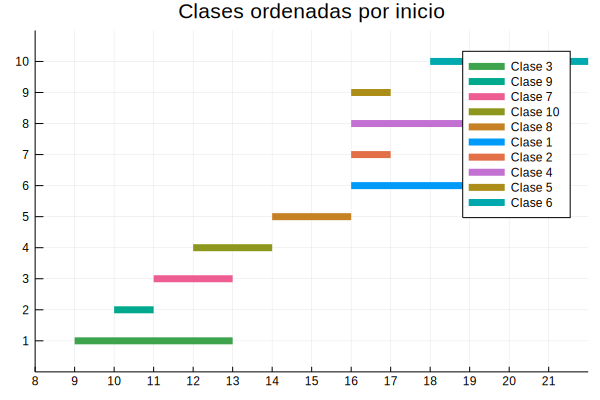

In [482]:
I_idx = sortperm(I)
IF = [ collect(I[I_idx[i]]:F[I_idx[i]]) for i in 1:n ]
p = plot(IF[1], [fill(1, length(IF[1]))],
    xticks = collect(0:21), yticks = collect(1:10),
    linecolor = I_idx[1],
#     legend = false,
    xlims = (8, 22), ylims = (0, n+1), linewidth = 7,
    label = string("Clase ", I_idx[1]), title = "Clases ordenadas por inicio")
for i in  2:n
    p = plot!(IF[i], [fill(i, length(IF[i]))], 
        linecolor = I_idx[i],
        linewidth = 7, label = string("Clase ", I_idx[i]))
end
p

## Algoritmo

In [483]:
# Helper function
function insert_into_sorted!(v::Vector, x) 
    index = first(searchsorted(v,x))
    insert!(v, index, x)
    return index
end

insert_into_sorted! (generic function with 1 method)

In [484]:
# Ordeno clases según hora de inicio
I_idx = sortperm(I)
# Alojo la 1era clase en iniciar
Cronograma = [[I_idx[1]]]
# Cola_de_Aulas contendrá las horas de finalización ordenadas
Cola_de_Aulas = [F[I_idx[1]]]

N_aulas = 1

for i in 2:length(I_idx)
    # Cuantas clases terminan después de q esta empiece? (hago +1 pq
    # searchsortedlast() hace >=, yo necesito > y parece q no acepta
    # una función de comparación como argumento).
    cont = searchsortedlast(Cola_de_Aulas, I[I_idx[i]])
    if cont == 0
        N_aulas += 1
        # Esta clase empieza antes de q finalicen las ya alojadas. Hay q sumar un aula.
        insert_into_sorted!(Cola_de_Aulas, F[I_idx[i]])
        push!(Cronograma, [I_idx[i]])
    elseif cont > length(Cola_de_Aulas)
    # Esta clase es compatible con las ya alojadas, pero si uso "cont"
    # p/ indexar voy a estar fuera del bound.
    # Alojo la nueva clase (la q va a terminar última) al final del vector.
        push!(Cola_de_Aulas, F[I_idx[i]])
        push!(Cronograma[end], I_idx[i])
    else
        # Esta clase es compatible con las ya alojadas. 
        # Tengo q mantener el orden de "Cola_de_Aulas"
        deleteat!(Cola_de_Aulas, cont)
        insert_into_sorted!(Cola_de_Aulas, F[I_idx[i]])
        push!(Cronograma[cont], I_idx[i])
    end
end
N_aulas

4

In [485]:
Cola_de_Aulas

4-element Array{Int64,1}:
 17
 19
 20
 22

In [486]:
Cronograma

4-element Array{Array{Int64,1},1}:
 [3, 7, 4] 
 [9, 2, 6] 
 [10, 8, 1]
 [5]       